In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import nxviz.plots as nv
import nxviz as nv
from nxviz import annotate
from datetime import datetime

/opt/anaconda3/lib/python3.9/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.3 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.3, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [2]:
df = pd.read_csv(r'/Users/hernanadasme/Projects/data_challenges/exports_29_11/rectype-63.csv')

In [3]:
df.rename({'Source': 'source'}, axis = 1, inplace=True)
df.rename({'Source year': 'source_year'}, axis = 1, inplace=True)
df.rename({'Boxers challenging RecordTitle': 'boxer_challenging'}, axis = 1, inplace=True)
df.rename({'Boxer Challenged RecordTitle': 'boxer_challenged'}, axis = 1, inplace=True)
df.rename({'Location Description': 'location_descp'}, axis = 1, inplace=True)
df.rename({'Status': 'status'}, axis = 1, inplace=True)
df.rename({'Conditions': 'condition'}, axis = 1, inplace=True)
df.rename({'City':'city'}, axis = 1, inplace=True)
df.rename({'Location':'location'}, axis = 1, inplace=True)
df.rename({'Challenge H-ID': 'challenge_id'}, axis = 1, inplace=True)
df.rename({'Boxers challenging H-ID': 'challenging_id'}, axis = 1, inplace=True)
df.rename({'Boxer Challenged H-ID': 'challenged_id'}, axis = 1, inplace=True)

In [69]:
df.head(10)

,challenge_id,rec_Title,source,source_year,challenging_id,boxer_challenging,challenged_id,boxer_challenged,status,condition,Basis,location_descp,city,location
0,969,Castillo\nBaeza,Semanario La Prensa. Los Andes,1928-03-02,865,"Castillo, Ernesto",836,"Baeza, Florencio",NaN,NaN,NaN,NaN,NaN,POINT(-70.597218 -32.833799)
1,972,Araya\nBolli,Semanario La Prensa. Los Andes,1928-04-05,882,"Araya, Manuel",780,"Bolli, Carlos",NaN,NaN,NaN,"Manager's business, downtown Los Andes.",NaN,POINT(-70.600875 -32.835752)
2,975,Valdes\nPérez,Semanario La Prensa. Los Andes,1928-04-08,833,"Valdes, Mario",272,"Pérez, Amador",NaN,NaN,NaN,NaN,NaN,POINT(-70.688871 -32.833203)
3,978,Ortiz\nAraya,Semanario La Prensa. Los Andes,1928-04-08,976,"Ortiz, Rafael",882,"Araya, Manuel",NaN,NaN,NaN,NaN,NaN,POINT(-70.598582 -32.833016)
4,985,Valdes\nGallardo,Semanario La Prensa. Los Andes,1928-04-29,833,"Valdes, Mario",827,"Gallardo, Pedro",NaN,NaN,NaN,NaN,NaN,POINT(-70.593621 -32.834478)
5,986,Silva\nIñiguez,Los Sports,1924-02-01,189,"Silva, Carlos",987,"Iñiguez, Mario",accepted,NaN,NaN,NaN,NaN,POINT(-70.397502 -23.650928)
6,988,Flores\nFarrafino,Los Sports,1924-03-07,302,"Flores, Sara",303,"Farrafino, Clementina",NaN,NaN,NaN,NaN,NaN,POINT(-70.397502 -23.650928)
7,993,Huerta\nGiaverini,Los Sports,1924-02-01,891,"Huerta, Francisco",573,"Giaverini, Oscar",NaN,NaN,NaN,NaN,NaN,POINT(-70.397502 -23.650928)
8,994,Huerta\nGiaverini,Los Sports,1924-02-01,891,"Huerta, Francisco",573,"Giaverini, Oscar",NaN,NaN,NaN,NaN,NaN,POINT(-70.397502 -23.650928)
9,1000,Tapia\nInostroza,Los Sports,1924-03-07,158,"Tapia, Julio",1001,"Inostroza, Ruperto",NaN,NaN,NaN,NaN,NaN,POINT(-70.397502 -23.650928)


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   challenge_id       127 non-null    int64 
 1   rec_Title          127 non-null    object
 2   source             127 non-null    object
 3   source_year        127 non-null    object
 4   challenging_id     127 non-null    int64 
 5   boxer_challenging  127 non-null    object
 6   challenged_id      127 non-null    int64 
 7   boxer_challenged   127 non-null    object
 8   status             14 non-null     object
 9   condition          14 non-null     object
 10  Basis              9 non-null      object
 11  location_descp     2 non-null      object
 12  city               23 non-null     object
 13  location           61 non-null     object
dtypes: int64(3), object(11)
memory usage: 14.0+ KB


In [79]:
df['source_year'] =  pd.to_datetime(df['source_year'])

**CREATING A NODELIST AND AN EDGELIST**

In [6]:
# 1. Create the graph
g = nx.from_pandas_edgelist(df, source='challenging_id', target='challenged_id')

challengers = [node for node in g.nodes() if node in df.challenging_id.unique()]
challenged = [node for node in g.nodes() if node in df.challenged_id.unique()]

In [10]:
print(len(challengers))
print(len(challenged))

90
103


In [127]:
# 2. Create a layout for our nodes 
pos = nx.spring_layout(g, k =0.4)
#pos["639"] = (0.005,0.005)

In [120]:
#the metric: size according to the degree centrality
size = [g.degree(node) * 400 for node in g.nodes() if node in df.challenging_id.unique()]

In [63]:
#draw the labels
challengers_dict = dict(zip(challengers, challengers))
challenged_dict = dict(zip(challenged, challenged))

In [64]:
print(challenged_dict) 
print(challengers_dict)

{836: 836, 882: 882, 780: 780, 833: 833, 272: 272, 827: 827, 987: 987, 303: 303, 573: 573, 1001: 1001, 321: 321, 423: 423, 1006: 1006, 1008: 1008, 1010: 1010, 1012: 1012, 1014: 1014, 572: 572, 146: 146, 1021: 1021, 735: 735, 1024: 1024, 1026: 1026, 223: 223, 733: 733, 1031: 1031, 1035: 1035, 98: 98, 1038: 1038, 1040: 1040, 126: 126, 1043: 1043, 934: 934, 935: 935, 936: 936, 1048: 1048, 938: 938, 1080: 1080, 276: 276, 535: 535, 1142: 1142, 1141: 1141, 1146: 1146, 1149: 1149, 1151: 1151, 1131: 1131, 1155: 1155, 1158: 1158, 339: 339, 1163: 1163, 156: 156, 420: 420, 1172: 1172, 1173: 1173, 1177: 1177, 1191: 1191, 1201: 1201, 1202: 1202, 1206: 1206, 982: 982, 1215: 1215, 1219: 1219, 1226: 1226, 530: 530, 232: 232, 1232: 1232, 539: 539, 1240: 1240, 1245: 1245, 1250: 1250, 1253: 1253, 1259: 1259, 1261: 1261, 727: 727, 1268: 1268, 1269: 1269, 660: 660, 151: 151, 1275: 1275, 1283: 1283, 1290: 1290, 921: 921, 1297: 1297, 1301: 1301, 1310: 1310, 62: 62, 1313: 1313, 1314: 1314, 284: 284, 1321: 132

In [97]:
for box, row in df.iterrows():
    g.nodes[row['challenging_id']]['name'] = row['boxer_challenging']
    g.nodes[row['challenged_id']]['name'] = row['boxer_challenged']
#print(B.nodes(data=True))
print(len(B.nodes()))

180


In [98]:
labels = nx.get_node_attributes(g, 'name')

In [99]:
print(labels)

{865: 'Castillo, Ernesto', 836: 'Baeza, Florencio', 882: 'Araya, Manuel', 780: 'Bolli, Carlos', 833: 'Valdes, Mario', 272: 'Pérez, Amador', 976: 'Ortiz, Rafael', 827: 'Gallardo, Pedro', 189: 'Silva, Carlos', 987: 'Iñiguez, Mario', 302: 'Flores, Sara', 303: 'Farrafino, Clementina', 891: 'Huerta, Francisco', 573: 'Giaverini, Oscar', 158: 'Tapia, Julio', 1001: 'Inostroza, Ruperto', 1003: 'Alley, Juan', 321: 'Salinas, Juan', 647: 'Olguín, Humberto', 423: 'Valdenegro', 1006: 'Henriquez', 1008: 'Leiva', 332: 'Acosta, Luis J.', 1010: 'Molina, Erasmo', 1012: 'Parra, Routier', 502: 'Rios, Agustin', 1014: 'Arratia, Jose', 143: 'Caldera, Francisco', 572: 'Anguita, Oscar', 77: 'Guerrero, Angel', 146: 'Lasseube, Enrique', 639: 'Gonzalez, Johnston', 1021: 'Suarez, Pablo', 735: 'Correa, Luis', 1024: 'Cipry, John', 1026: 'Saavedra, Clemente', 732: 'Villablanca, Luis', 223: 'Jaña, Andres', 733: 'Meza, Fernando', 163: 'García, Francisco', 1031: 'Valdivieso, Raul', 162: 'Guerra, Oscar', 1035: 'Martinez, 

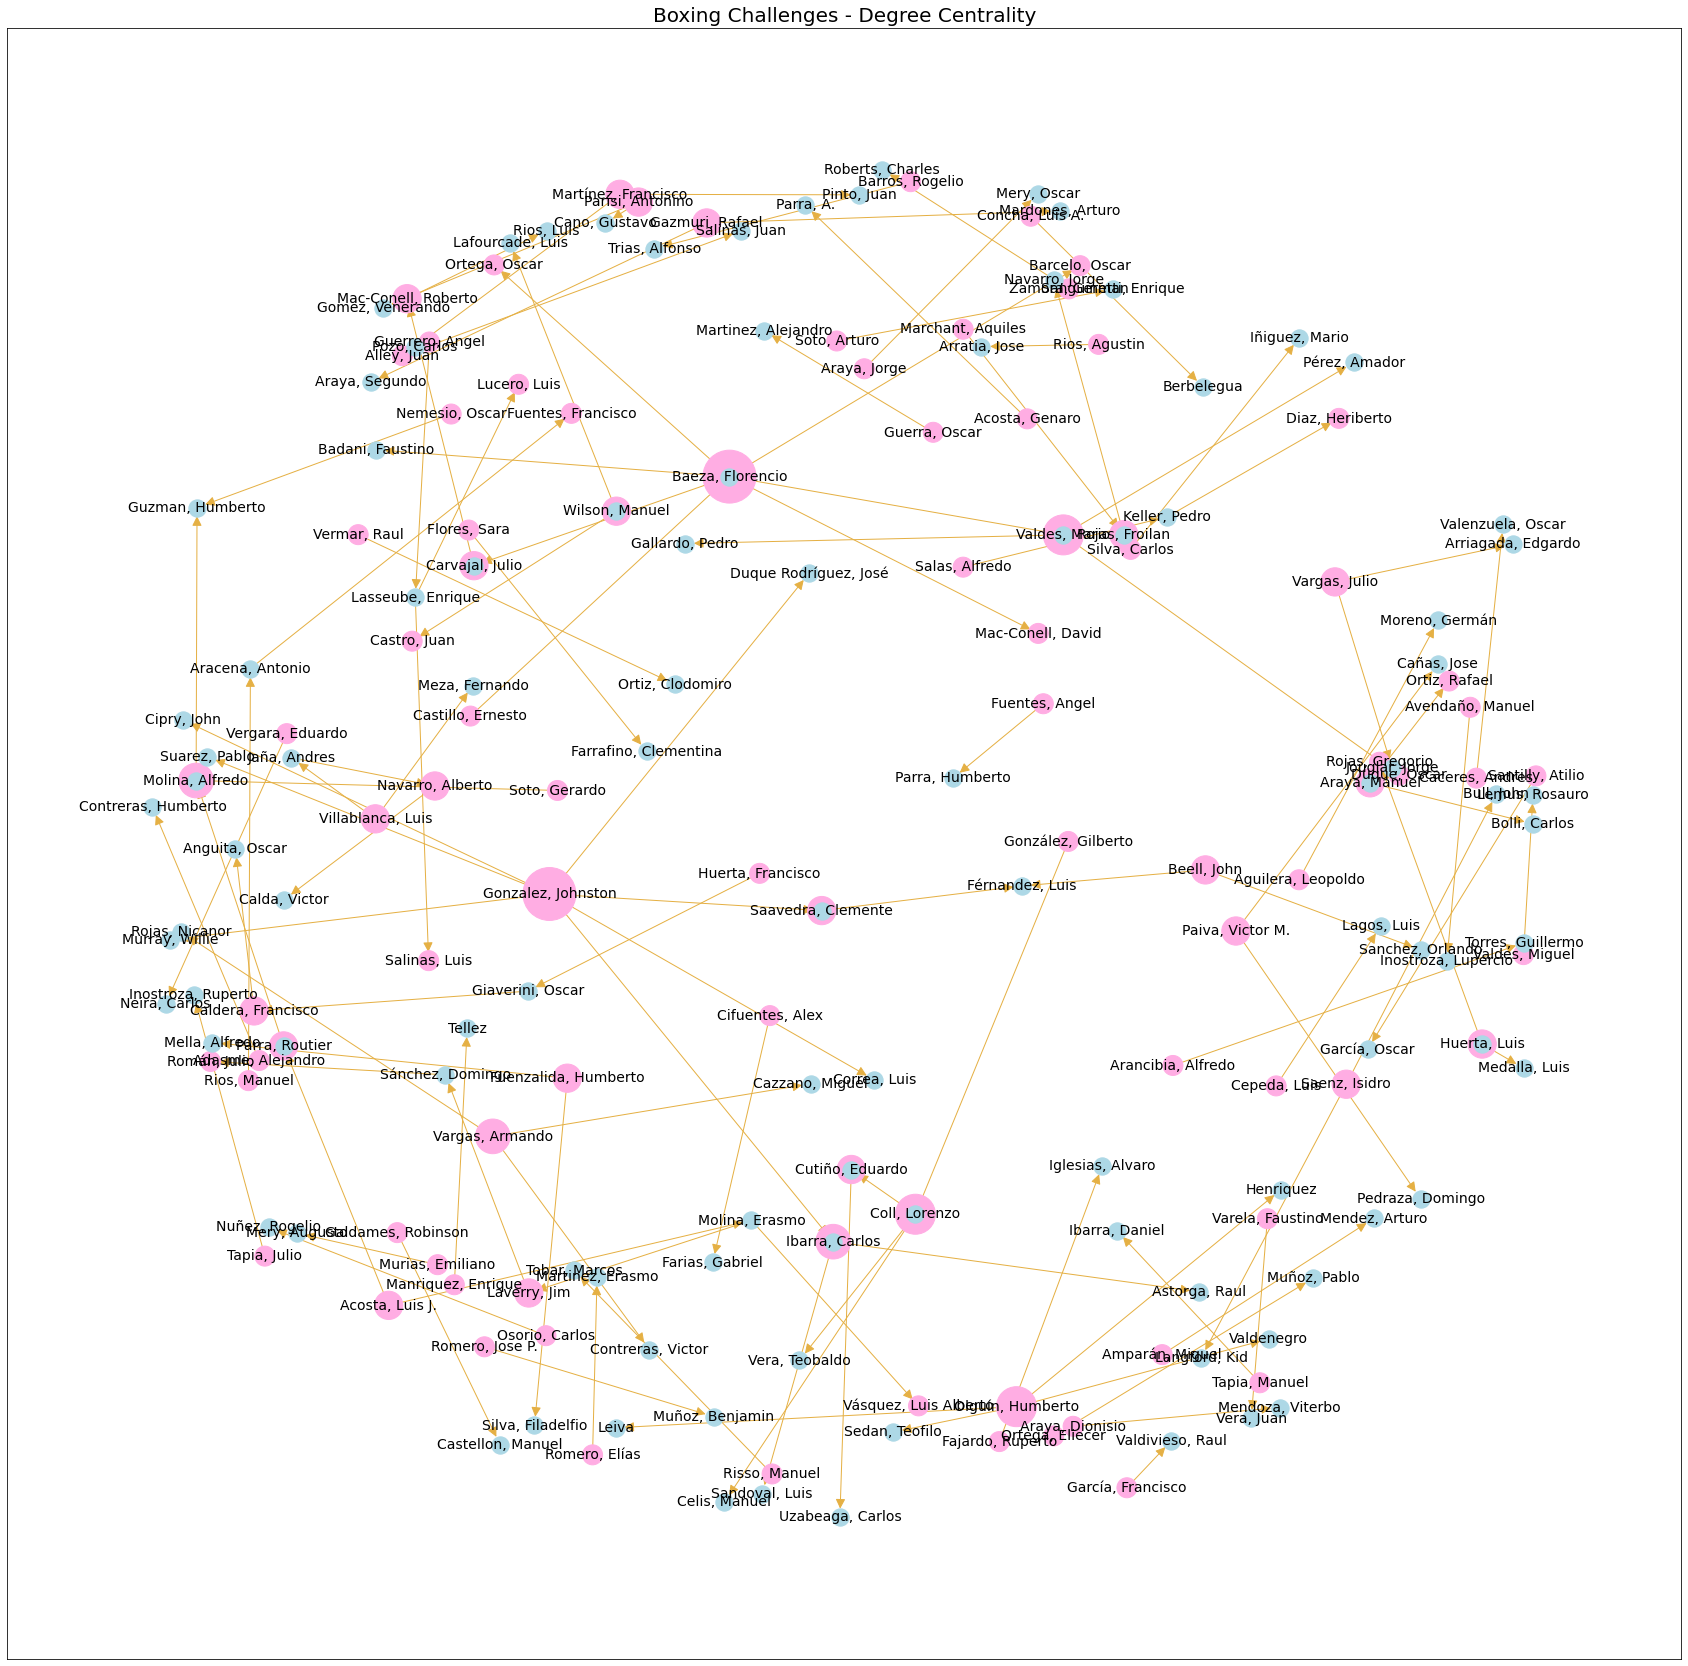

In [131]:
fig, ax = plt.subplots(figsize=(30, 30))
nx.draw_networkx_edges(g, pos, edge_color='#E5B044',arrows=True, arrowsize=20)
nx.draw_networkx_nodes(g, pos, nodelist = challengers, node_size=size, node_color ='#FFADE3')
nx.draw_networkx_nodes(g, pos, nodelist=challenged, node_size=300, node_color ='lightblue')
nx.draw_networkx_labels(g, pos, labels, font_size=14)
#nx.draw_networkx_labels(g, pos, labels=challengers_dict)
#nx.draw_networkx_labels(g, pos, labels=challenged_dict)
#ax.margins(0.1, 0.05)
#fig.tight_layout()
plt.axis("on")
plt.title('Boxing Challenges - Degree Centrality', fontsize=20)
#fig5 = plt.gcf()
#fig5.savefig("/Users/hernanadasme/Documents/data_challenges/graph.jpg", dpi=600) 
plt.show()